## Table of Contents:
* [Introduction](#introduction)
* [Implementation](#implementation)
* [Conclusion](#conclusion)

# 1. Introduction <a name="introduction"></a>


## Objectives
- Classify stars based on quantitative data
- Use linear regression and other machine learning models to predict labels 
- Explore relations of empirical colour data
- Use this notebook to learn about different Stars

## Dataset

Units of measure are relative to the Sun.

Temperature - Kelvin (K)

**L** - Luminosity relative to the Sun (L/Lo)\
**R** - Radius relative to the Sun (R/Ro)\
**A_M** - Absolute Magnitude (Mv)\
**Color** - General Color of Spectrum\
**Spectral_Class** - Class assigned based on reflectance spectrum, color, and sometimes albedo [(SMASS)](https://en.wikipedia.org/wiki/Asteroid_spectral_types)\
**Type** - Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, Super Giants, Hyper Giants


"Type" will be the target label the model aims to predict

Data from: https://www.kaggle.com/datasets/brsdincer/star-type-classification

In [1]:
import pandas as pd

# load the data set
data = pd.read_csv("./Stars.csv")
display(data.head())

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


### Colour & Spectral Classes

`Color` and `Spectral_Class` stand out from the other features as two types of observed data, categorized by subjectivity. Classification by spectral luminosity has often been subject to poor range and criticism. Although examination of physical appearances and wavelengths is still widely used in astronomy, it is agreed upon as a temporary taxonomic system for general celestial objects.

The words in the `Color` column also contain tokens with the suffix '-ish', leading me to believe this part of the data was recorded manually.

For these reasons, I will exclude the `Color` and `Spectral_Class` variables from the main training data. Instead they will have comparisons explored as their own dataframe. 

https://en.wikipedia.org/wiki/Asteroid_spectral_types

0 - Red Dwarf, 1 - Brown Dwarf, 2-White Dwarf, 3-Main Sequence , 4-Super Giants, 5-Hyper Giants

In [2]:
# display unique data in both empirical columns
display(pd.unique(data['Color']))
display(pd.unique(data['Spectral_Class']))

# example of the standalone empirical dataframe
data_emp = data.iloc[:,4:6]
display(data_emp.head())

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

,Color,Spectral_Class
0,Red,M
1,Red,M
2,Red,M
3,Red,M
4,Red,M


# 2. Implementation <a name="implementation"></a>


In [3]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data set
data = pd.read_csv("./Stars.csv")
display(data.head())


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
# display shape, type, and count of data
print(data.shape, '\n')
data.info()
data.nunique()


(240, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
Type                6
dtype: int64

In [5]:
# check for 0 and null values
display(data.isna().sum())

# check for duplicated rows
data.duplicated().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

0

## Feature Engineering

In [6]:
# check unique value counts for Colors
print(data['Color'].value_counts())

colours = data.iloc[:,4:5]

# manually reduce the Color values
white_sub = 'hit' # substring used to find 'white'
blue_sub = 'Blue'
red_sub = 'Red'
orange_sub = 'range'
yellow_sub = 'ellow'
white_col = []
blue_col = []
red_col = []
orange_col = []
yellow_col = []

# quick algorithm to check all row tokens
# appends 1 if found, 0 if not found
for row in colours['Color']:
    if white_sub in row:
        white_col.append(1)
    else:
        white_col.append(0)
    if blue_sub in row:
        blue_col.append(1)
    else:
        blue_col.append(0)
    if red_sub in row:
        red_col.append(1)
    else:
        red_col.append(0)
    if orange_sub in row:
        orange_col.append(1)
    else:
        orange_col.append(0)
    if yellow_sub in row:
        yellow_col.append(1)
    else:
        yellow_col.append(0)

# concatenate columns into new dataFrame 
encoded_colours = pd.DataFrame({'Red': red_col,
                                'Blue' : blue_col, 
                                'Yellow' : yellow_col, 
                                'Orange' : orange_col, 
                                'White' : white_col })

display(encoded_colours)



Color
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: count, dtype: int64


,Red,Blue,Yellow,Orange,White
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
235,0,1,0,0,0
236,0,1,0,0,0
237,0,0,0,0,1
238,0,0,0,0,1


In [7]:
# check unique value counts for Spectral_Class
print(data['Spectral_Class'].value_counts())

spectral = data.iloc[:,5:6]

# hot encode classes into 1 or 0
encoded_spectral = pd.get_dummies(spectral, prefix='sc', dtype='int')

display(encoded_spectral)

Spectral_Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64


,sc_A,sc_B,sc_F,sc_G,sc_K,sc_M,sc_O
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
235,0,0,0,0,0,0,1
236,0,0,0,0,0,0,1
237,1,0,0,0,0,0,0
238,1,0,0,0,0,0,0


In [8]:
# combine two encoded dataFrames
data_encoded_emp = pd.concat([encoded_colours, encoded_spectral], axis=1)
data_encoded_emp

,Red,Blue,Yellow,Orange,White,sc_A,sc_B,sc_F,sc_G,sc_K,sc_M,sc_O
0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,1,0,0,0,0,0,0,0,0,0,1
236,0,1,0,0,0,0,0,0,0,0,0,1
237,0,0,0,0,1,1,0,0,0,0,0,0
238,0,0,0,0,1,1,0,0,0,0,0,0


## Data Visualization

In [9]:
# split data by main features
data_features = data.iloc[:,0:4]
display(data_features.sample(n=5))

# dataframe of empirical features
data_emp = data.iloc[:,4:6]
display(data_emp.sample(n=5))

# dataframe of target labels
data_target = data.iloc[:,6:7]
display(data_target.sample(n=5))
target_names = ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants']


,Temperature,L,R,A_M
41,3365,340000.00000,23.0000,-6.20
82,8930,0.00056,0.0095,13.78
17,3692,0.00367,0.4700,10.80
35,8052,8.70000,1.8000,2.42
27,7700,0.00011,0.0128,14.47


,Color,Spectral_Class
200,Blue,B
86,Blue White,B
130,Red,M
154,Blue-white,B
199,Red,M


,Type
188,0
140,2
148,2
161,4
164,4


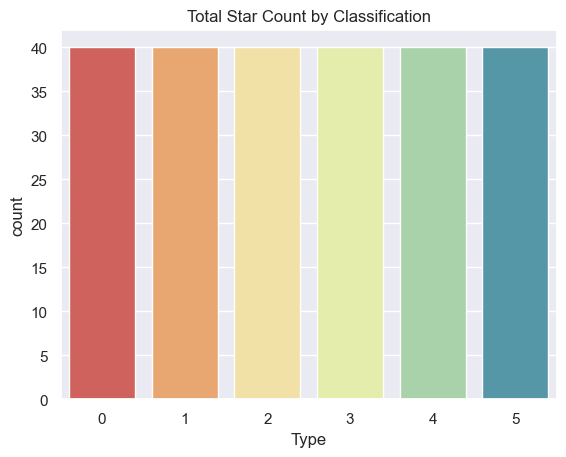

In [41]:
# set theme
sns.set_theme(style="darkgrid")

# show class type counts
plot = sns.countplot(x=data_target['Type'], palette='Spectral')
plot.set(title='Total Star Count by Classification')
plt.show()

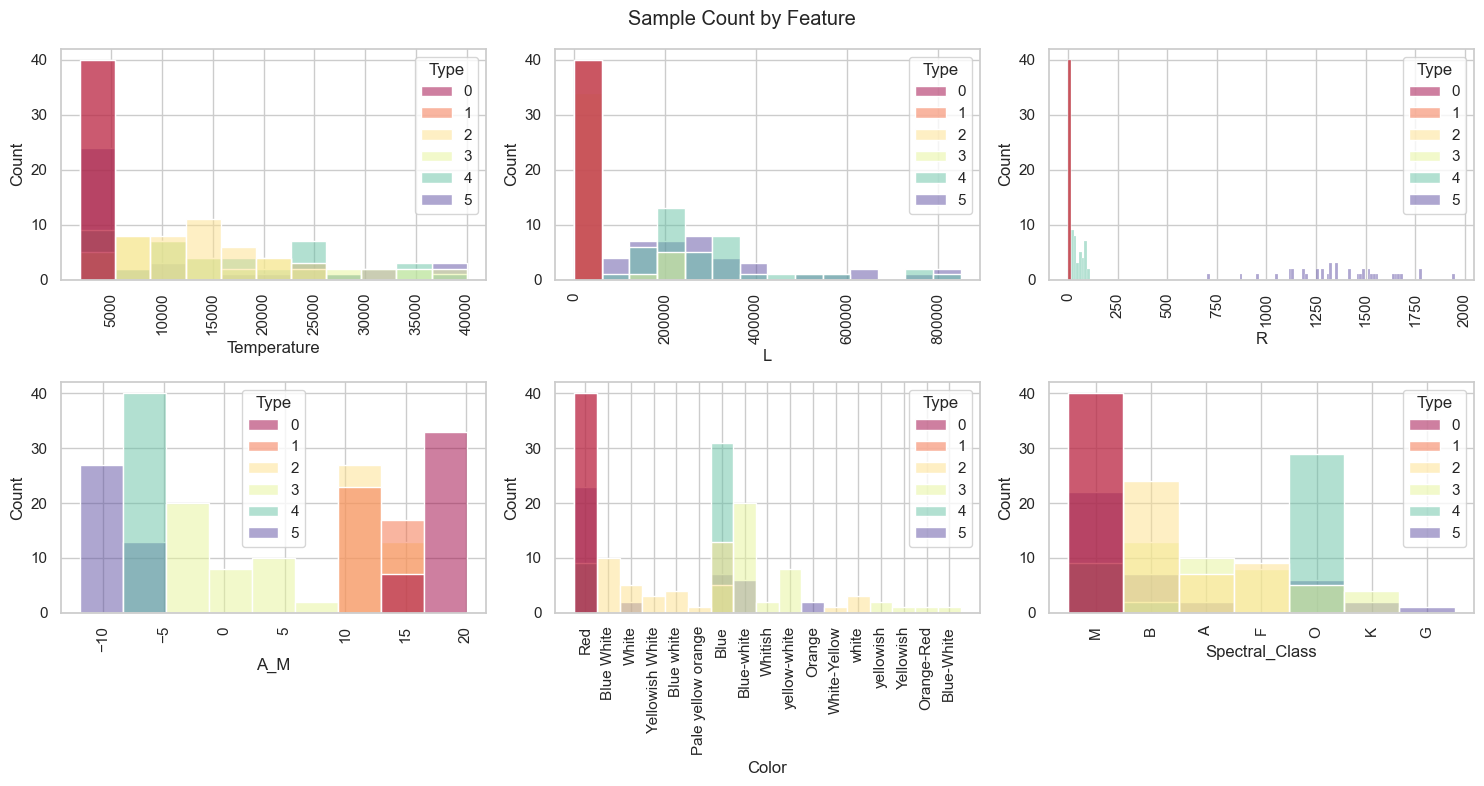

In [39]:
plot_d = data.iloc[:,0:6]
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()
for ax, col in zip(axes, plot_d.columns):
    sns.histplot(data=plot_d, 
                 x=col, 
                 ax=ax, 
                 hue=data_target['Type'], 
                 palette="Spectral")
    ax.tick_params(axis='x', rotation=90)
    
fig.suptitle('Sample Count by Feature')
plt.tight_layout()
plt.show()

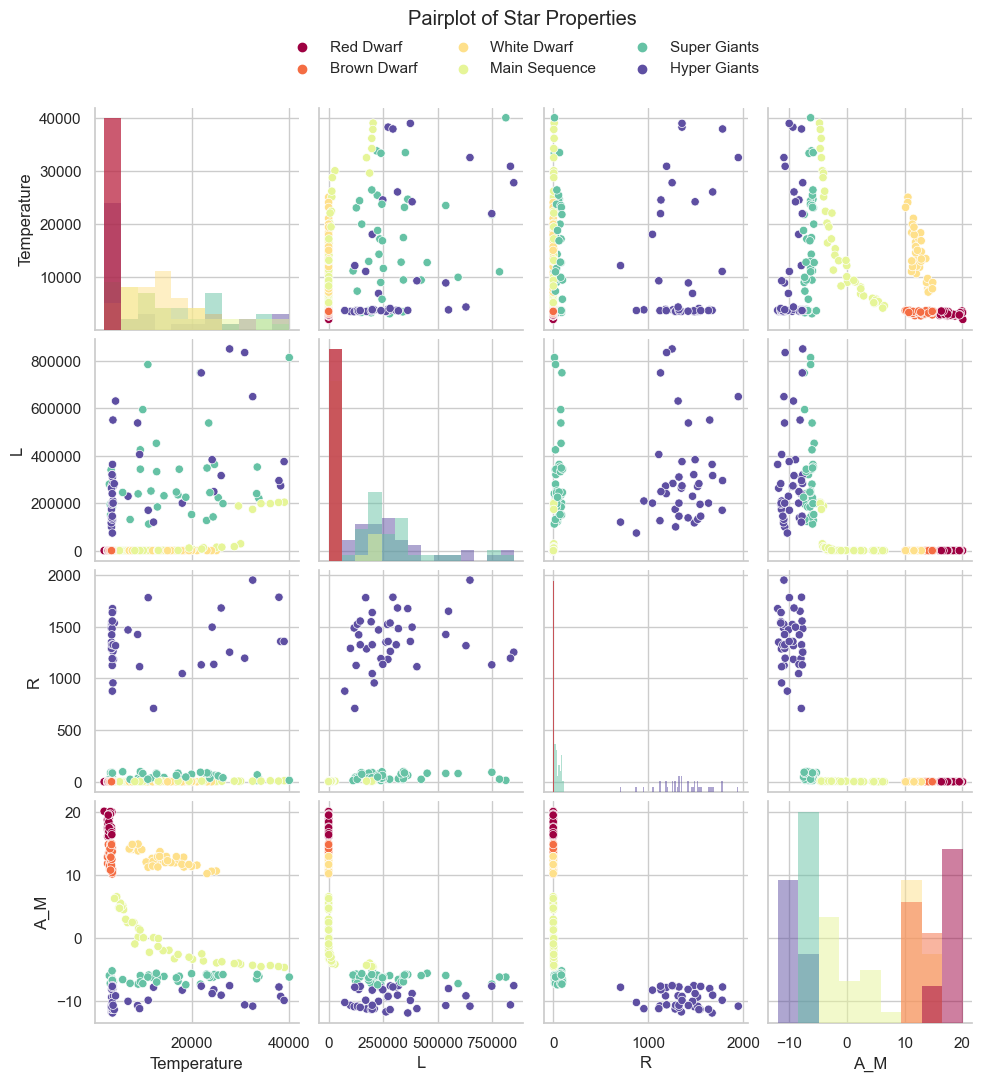

In [38]:
plot = sns.pairplot(data, 
                    hue='Type', 
                    diag_kind="hist", 
                    diag_kws=dict(linewidth=0), 
                    palette='Spectral')

plot.fig.suptitle("Pair Plot of Star Properties", y=1.08)
for t, l in zip(plot._legend.texts, target_names):
    t.set_text(l)
sns.move_legend(plot, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.show()

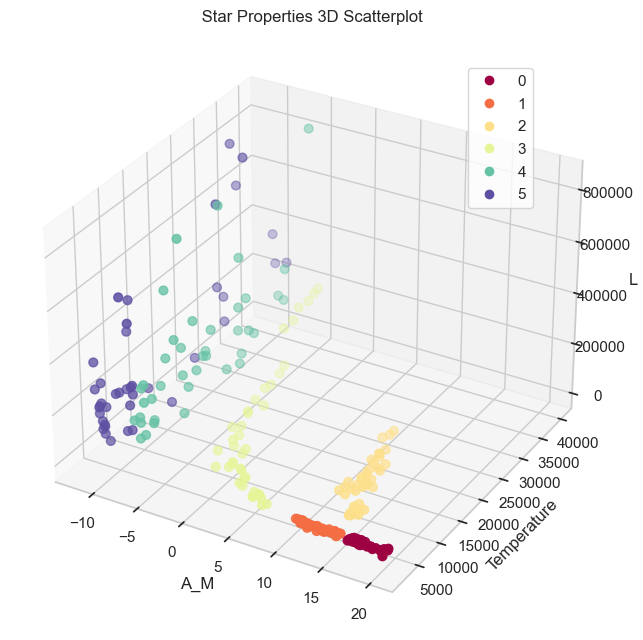

In [37]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_theme(style="whitegrid")

#plot three highest correlated variables
p_x = data_features['A_M']
p_y = data_features['Temperature']
p_z = data_features['L']
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(p_x, p_y, p_z, c=data_target['Type'], cmap='Spectral', s=40)
ax.set_title(' 3D Scatterplot of Star Features')
ax.set_xlabel('A_M')
ax.set_ylabel('Temperature')
ax.set_zlabel('L')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(.75, .95), loc=2)
plt.show()

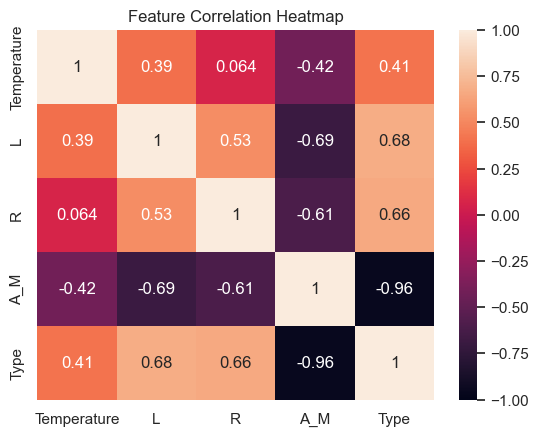

In [30]:
# set up variables
hm_data = pd.concat([data_features, data_target], axis=1)
plt.title('Feature Correlation Heatmap')

# display heatmap
sns.heatmap(hm_data.corr(), annot=True, vmin=-1, vmax=+1)
plt.show()

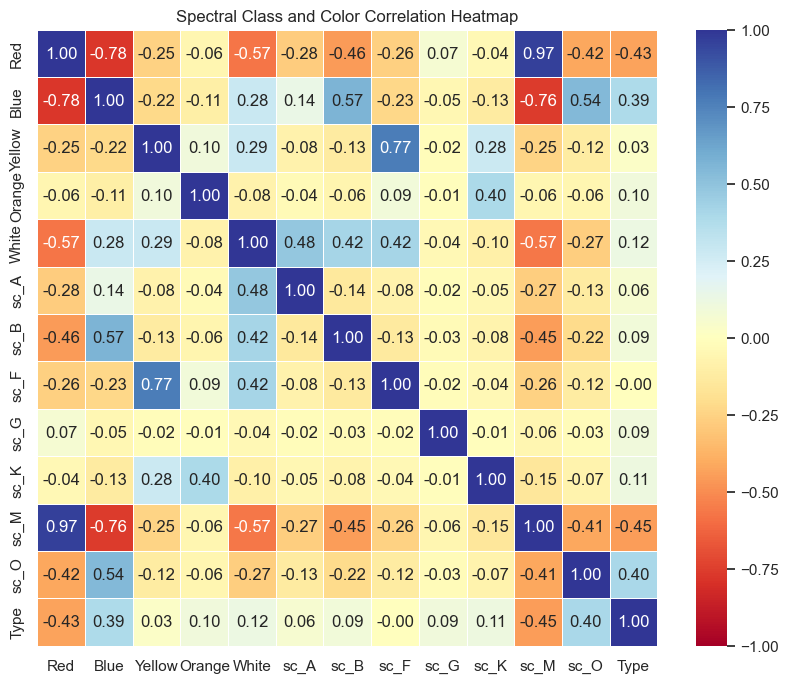

In [26]:
# set up variables
hm_emp_data = pd.concat([data_encoded_emp, data_target], axis=1)

# display heatmap
plt.figure(figsize = (10,8))
sns.heatmap(hm_emp_data.corr(), 
            annot=True, 
            cmap="RdYlBu", 
            linewidths=0.5, 
            vmin=-1, vmax=+1,
            fmt=".2f")
plt.title('Spectral Class and Color Correlation Heatmap')
plt.show()

0 Red
0.9666556422363951
1 Blue
0.5696637286911369
2 Yellow
0.7726433877117863
3 Orange
0.39609128926382914
4 White
0.48110847759312425


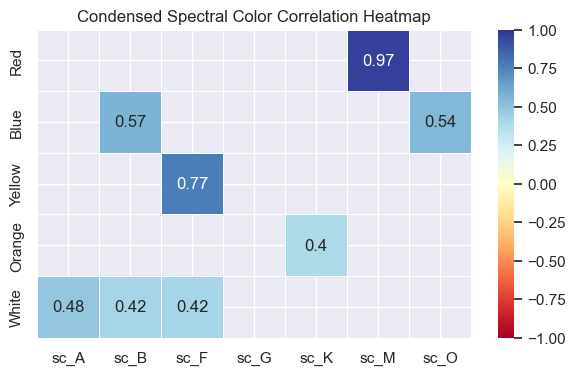

In [28]:
# sort colour and class, make some early learning assumptions
emp_correlations = data_encoded_emp.corr()
truncated = emp_correlations.iloc[0:5,5:12]

for i,col in enumerate(emp_correlations):
    if i > 4: break
    print(i, col)
    print(emp_correlations[col].sort_values()[-2])

filter_corr = truncated[truncated > 0.35]
plt.figure(figsize = (7,4))
sns.heatmap(filter_corr, 
            annot=True, 
            cmap="RdYlBu", 
            linewidths=0.5, 
            vmin=-1, vmax=+1)
plt.title('Condensed Spectral Color Correlation Heatmap')
plt.show()

We can observe that the correlation between colours and spectral class has overall very weak correlation to classifying the star type.

We can also learn from the strong correlations between `Color` and `Spectral_Class` that the observed hue may be directly related to how the star is categorized under the SMASS classification system. This further solidifies the fact these two variables were more likely recorded from empirical observations.

## Scaling

In [17]:
data_features.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


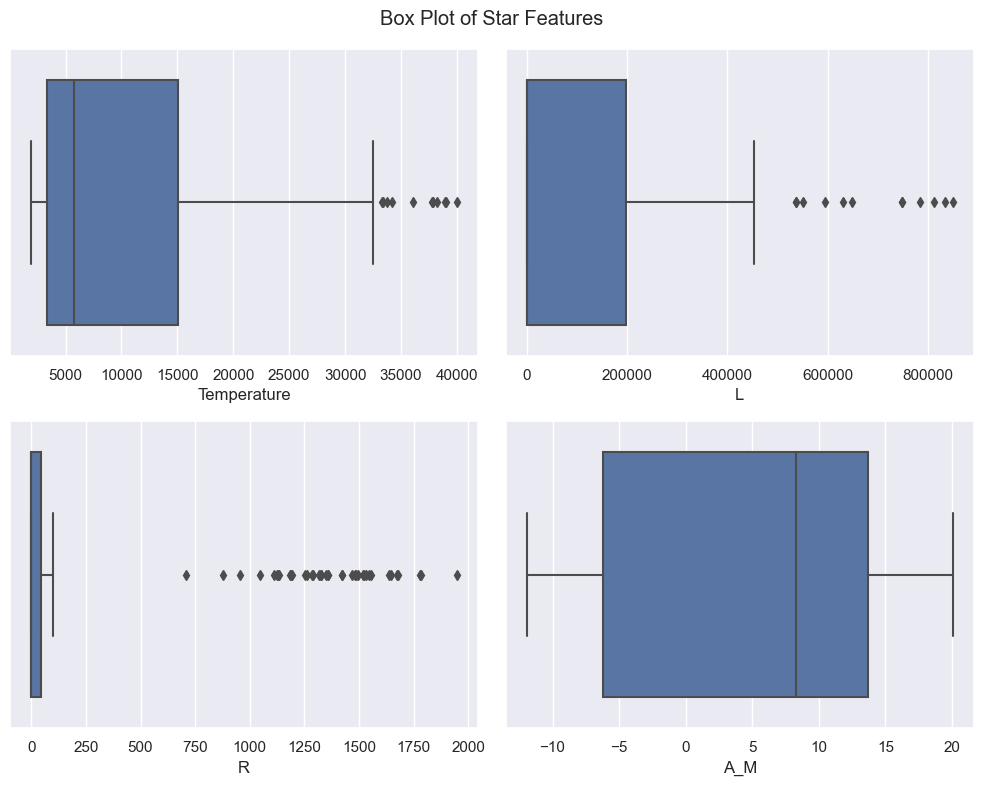

In [43]:
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = axes.flatten()
for ax, col in zip(axes, data_features.columns):
    sns.boxplot(data=data_features, 
                 x=col, 
                 ax=ax)
    
fig.suptitle('Box Plot of Star Features')
plt.tight_layout()
plt.show()

As the data currently stands, the standard deviation for some features is very large. The nature of our data encompasses very large units of measure- as a result, the range of values is large. This is not ideal and may cause problems when evaluating our model. 

From the box plot we can observe many outliers in the dataset. Therefore, scaling would be better than normalizing in this situation, due to the small sample size.

In [19]:
# use sklearn StandardScaler library
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)
data_scaled = pd.DataFrame(data_scaled, columns=data_features.columns)

# show scaled data
display(data_scaled)
display(data_scaled.describe())

,Temperature,L,R,A_M
0,-0.779382,-0.598624,-0.459210,1.116745
1,-0.782110,-0.598624,-0.459241,1.162414
2,-0.828477,-0.598624,-0.459342,1.362213
3,-0.807496,-0.598624,-0.459229,1.167171
4,-0.897819,-0.598624,-0.459340,1.491607
...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718
236,2.133913,4.059319,1.854068,-1.428317
237,-0.175029,2.403157,2.297800,-1.437832
238,-0.132438,1.662878,1.695177,-1.485403


,Temperature,L,R,A_M
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,-1.480297e-17,2.960595e-17,-1.572816e-17,-3.885781e-17
std,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00
min,-8.978190e-01,-5.986236e-01,-4.595230e-01,-1.551051e+00
25%,-7.504023e-01,-5.986236e-01,-4.593402e-01,-1.009928e+00
50%,-4.953014e-01,-5.986232e-01,-4.580618e-01,3.739676e-01
75%,4.781574e-01,5.074424e-01,-3.767029e-01,8.862626e-01
max,3.094941e+00,4.145201e+00,3.316058e+00,1.491607e+00


## Building the Model

In [176]:
# code adapted from https://github.com/patrickloeber/MLfromscratch
# MSE (L2)
class myLinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated
    
    def get_weights(self):
        return self.weights, self.bias
    
# cost calculation
def mse(y_true, y_pred):
    return np.mean(np.power((y_true - y_pred), 2))

def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [177]:
#test the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data_scaled
y = np.reshape(data_target, (240,))

# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

# display(np.shape(X_train))

regression = myLinearRegression(learning_rate=0.01, n_iters=2000)
regression.fit(X_train, y_train)
y_pred = regression.predict(X_test)

print(mse(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.20631361965005138
0.9226525304332159


In [178]:
from sklearn.metrics import explained_variance_score

print(explained_variance_score(y_test, y_pred))

0.9222794739972874


## Validation

In [ ]:
# cross val

## Testing Other Models

In [21]:
#Testing

# 3. Conclusion  <a name="conclusion"></a>


# References
1. https://www.kaggle.com/datasets/brsdincer/star-type-classification
2. https://en.wikipedia.org/wiki/Asteroid_spectral_types
3. https://simple.wikipedia.org/wiki/Asteroid_spectral_types#SMASS_classification
4. https://astronomy.stackexchange.com/questions/38412/determine-spectral-type-of-star-from-its-properties
5. https://iopscience.iop.org/article/10.1086/319956/fulltext/
6. https://articles.adsabs.harvard.edu//full/1973ARA%26A..11...29M/0000029.000.html